# Python Machine Learning 

------
## Tools to Learn / Use

* Load and Clean Data  
  Use Pandas unless you have a reason not to (data too large to fit in memory)
* Explore Data  
  Pandas, numpy, matplotlib, seaborn
* Models  
  SciPy, scikit-learn  
  https://www.w3schools.com/python/python_ml_getting_started.asp  
  https://www.kaggle.com/learn/intro-to-machine-learning  
  Deep Learning: Pytorch, Keras, TensorFlow  
  https://www.datacamp.com/tutorial/pytorch-vs-tensorflow-vs-keras
  
------
## Good Reference Site

* https://machinelearningmastery.com/start-here/
* https://machinelearningmastery.com/start-here/#algorithms
* https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
* https://machinelearningmastery.com/machine-learning-performance-improvement-cheat-sheet/

------
## Python Packages


In [1]:
# Python version
import sys
print(f'Python: {sys.version}')

# pandas
import pandas as pd
print(f'pandas: {pd.__version__}')

# numpy
import numpy as np
print(f'numpy: {np.__version__}')

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
print(f'matplotlib: {matplotlib.__version__}')

# seaborn
import seaborn as sns
print(f'seaborn: {sns.__version__}')

# scikit-learn
import sklearn
print(f'sklearn: {sklearn.__version__}')

Python: 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:49:36) [Clang 16.0.6 ]
pandas: 2.2.2
numpy: 1.26.4
matplotlib: 3.9.2
seaborn: 0.13.2
sklearn: 1.5.1


-----
## Problem

We will use weather data from [MSU's North Farm](http://deltaweather.extension.msstate.edu/msu-north-farm-starkv) (next to the research park) to see if we can predict if it is going to rain tomorrow. 

We will use daily information from 6/1/2019 to 9/1/2024.

| Attribute   | Definition    |
|:------------|:--------------|
|Date|                Record Date MM/DD/YYYY  |
|Julian|              Record Julian Date NNN day of the year  |
|AirTempMax|          Air Temperature Max (Degrees Fahrenheit F)  |
|AirTempMin|          Air Temperature Min (Degrees Fahrenheit F)  |
|AirTempObsv|         Air Temperature Observed (Degrees Fahrenheit F) This is an instantaneous reading for air temperature at 7:00:00 standard time.  |
|HumidMax|            Relative Humidity Max (Percent)  |
|HumidMin|            Relative Humidity Min (Percent)  |
|HumidObsv|           Relative Humidity Observed (Percent) This is an instantaneous reading at 7:00:00 standard time.  |
|Precip|              Precipitation (Inches n.nn) total rain fall that occurred for the day.  |
|WindRun|             Wind Run (Miles) Wind travel for the day.  |
|AvgWindSpeed|        Wind Speed (Miles Per Hour) Resultant / Average speed for the day.  |
|WindDirection|       Wind Direction (Degrees) Resultant Direction for the day  |
|SolarRadiation|      Solar Radiation (Langley's) that occurred for the day.  |
|SoilTempMax|         Soil Temperature Max at 2 inch depth (Degrees Fahrenheit F) that occurred during the day.  |
|SoilTempMin|         Soil Temperature Min at 4 inch depth (Degrees Fahrenheit F) that occurred during the day.  |
|SoilTempObsv|        Soil Temperature Observed at 4 inch depth (Degrees Fahrenheit F) This is an instantaneous reading 4 inch soil temperature at 7:00:00 standard time.  |


-----
## Load Data



In [2]:
RawData = pd.read_csv('https://raw.githubusercontent.com/jcrumpton/DSCI_6113_Data/refs/heads/main/DS_Club/MSU_North_Farm.csv')
display(RawData.info())
RawData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1920 non-null   object 
 1   Julian          1920 non-null   int64  
 2   AirTempMax      1920 non-null   int64  
 3   AirTempMin      1919 non-null   float64
 4   AirTempObsv     1919 non-null   float64
 5   HumidMax        1920 non-null   int64  
 6   HumidMin        1919 non-null   float64
 7   HumidObsv       1919 non-null   float64
 8   Precip          1920 non-null   float64
 9   WindRun         1920 non-null   int64  
 10  AvgWindSpeed    1920 non-null   float64
 11  WindDirection   1920 non-null   int64  
 12  SolarRadiation  1920 non-null   int64  
 13  SoilTempMax     1920 non-null   int64  
 14  SoilTempMin     1920 non-null   int64  
 15  SoilTempObsv    1919 non-null   float64
dtypes: float64(7), int64(8), object(1)
memory usage: 240.1+ KB


None

,Date,Julian,AirTempMax,AirTempMin,AirTempObsv,HumidMax,HumidMin,HumidObsv,Precip,WindRun,AvgWindSpeed,WindDirection,SolarRadiation,SoilTempMax,SoilTempMin,SoilTempObsv
0,6/1/19,152,90,67.0,76.0,92,35.0,65.0,0.00,84,3.5,334,645,84,75,75.0
1,6/2/19,153,93,66.0,78.0,95,32.0,63.0,0.00,77,3.2,316,637,85,76,76.0
2,6/3/19,154,92,69.0,77.0,96,36.0,75.0,0.00,60,2.5,60,620,85,77,77.0
3,6/4/19,155,93,70.0,75.0,88,43.0,67.0,0.00,64,2.7,142,475,85,78,79.0
4,6/5/19,156,88,70.0,80.0,96,48.0,77.0,0.05,124,5.2,232,326,83,80,80.0


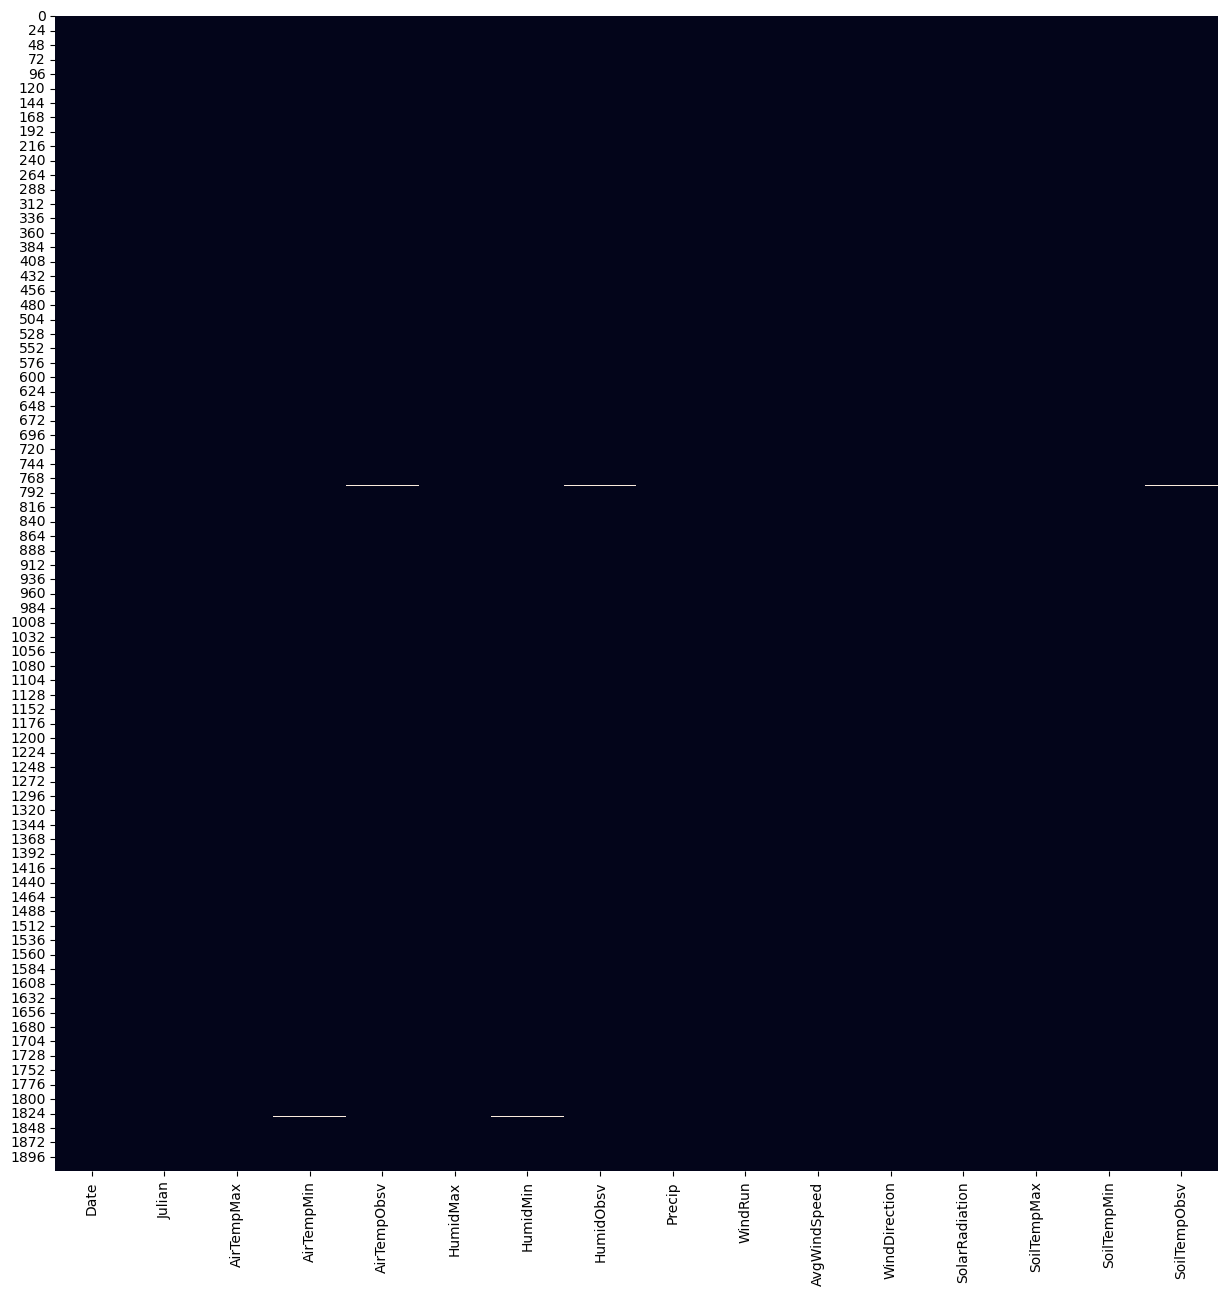

In [3]:
plt.figure(figsize=(15, 15))
sns.heatmap(RawData.isnull(), cbar=False);


In [4]:
Data = RawData.dropna().copy() 
Data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 0 to 1919
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1918 non-null   object 
 1   Julian          1918 non-null   int64  
 2   AirTempMax      1918 non-null   int64  
 3   AirTempMin      1918 non-null   float64
 4   AirTempObsv     1918 non-null   float64
 5   HumidMax        1918 non-null   int64  
 6   HumidMin        1918 non-null   float64
 7   HumidObsv       1918 non-null   float64
 8   Precip          1918 non-null   float64
 9   WindRun         1918 non-null   int64  
 10  AvgWindSpeed    1918 non-null   float64
 11  WindDirection   1918 non-null   int64  
 12  SolarRadiation  1918 non-null   int64  
 13  SoilTempMax     1918 non-null   int64  
 14  SoilTempMin     1918 non-null   int64  
 15  SoilTempObsv    1918 non-null   float64
dtypes: float64(7), int64(8), object(1)
memory usage: 254.7+ KB


In [5]:
# Convert Types

Data['Date'] = pd.to_datetime(Data['Date'], format="%m/%d/%y", errors='coerce') 
Data['AirTempMin'] = Data['AirTempMin'].astype(int)  
Data['AirTempObsv'] = Data['AirTempObsv'].astype(int)  
Data['HumidMin'] = Data['HumidMin'].astype(int)  
Data['HumidObsv'] = Data['HumidObsv'].astype(int)  
Data['SoilTempObsv'] = Data['SoilTempObsv'].astype(int)

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 0 to 1919
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1918 non-null   datetime64[ns]
 1   Julian          1918 non-null   int64         
 2   AirTempMax      1918 non-null   int64         
 3   AirTempMin      1918 non-null   int64         
 4   AirTempObsv     1918 non-null   int64         
 5   HumidMax        1918 non-null   int64         
 6   HumidMin        1918 non-null   int64         
 7   HumidObsv       1918 non-null   int64         
 8   Precip          1918 non-null   float64       
 9   WindRun         1918 non-null   int64         
 10  AvgWindSpeed    1918 non-null   float64       
 11  WindDirection   1918 non-null   int64         
 12  SolarRadiation  1918 non-null   int64         
 13  SoilTempMax     1918 non-null   int64         
 14  SoilTempMin     1918 non-null   int64         
 15  SoilTempO

In [6]:
Data.head()


,Date,Julian,AirTempMax,AirTempMin,AirTempObsv,HumidMax,HumidMin,HumidObsv,Precip,WindRun,AvgWindSpeed,WindDirection,SolarRadiation,SoilTempMax,SoilTempMin,SoilTempObsv
0,2019-06-01,152,90,67,76,92,35,65,0.00,84,3.5,334,645,84,75,75
1,2019-06-02,153,93,66,78,95,32,63,0.00,77,3.2,316,637,85,76,76
2,2019-06-03,154,92,69,77,96,36,75,0.00,60,2.5,60,620,85,77,77
3,2019-06-04,155,93,70,75,88,43,67,0.00,64,2.7,142,475,85,78,79
4,2019-06-05,156,88,70,80,96,48,77,0.05,124,5.2,232,326,83,80,80


In [7]:
Data.describe()

,Date,Julian,AirTempMax,AirTempMin,AirTempObsv,HumidMax,HumidMin,HumidObsv,Precip,WindRun,AvgWindSpeed,WindDirection,SolarRadiation,SoilTempMax,SoilTempMin,SoilTempObsv
count,1918,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,2022-01-15 03:21:57.622523392,183.860271,76.105839,54.215328,59.540667,95.570386,50.624609,87.033368,0.167445,88.981230,3.704484,189.358186,367.168405,70.063087,65.285193,65.648071
min,2019-06-01 00:00:00,1.000000,20.000000,6.000000,7.000000,60.000000,15.000000,54.000000,0.000000,0.000000,0.000000,0.000000,7.000000,35.000000,34.000000,34.000000
25%,2020-09-22 06:00:00,96.250000,66.000000,41.000000,47.000000,94.000000,39.000000,81.000000,0.000000,56.000000,2.300000,119.250000,256.250000,59.000000,54.000000,55.000000
50%,2022-01-15 12:00:00,186.000000,79.000000,57.000000,63.000000,96.000000,49.000000,89.000000,0.000000,79.000000,3.300000,174.000000,384.000000,70.000000,66.000000,66.000000
75%,2023-05-09 18:00:00,270.000000,89.000000,68.000000,74.000000,99.000000,60.000000,94.000000,0.050000,113.000000,4.700000,290.000000,496.000000,83.000000,78.000000,78.000000
max,2024-09-01 00:00:00,366.000000,102.000000,79.000000,85.000000,100.000000,98.000000,100.000000,5.330000,279.000000,11.600000,360.000000,680.000000,91.000000,85.000000,85.000000
std,NaN,103.117556,14.979337,15.489948,16.437681,4.436417,16.256321,9.092175,0.469040,44.978296,1.879664,104.127893,162.155851,13.107942,12.794654,12.572408


-----
## Add Columns


In [8]:
# Did it rain on a given day?

Data['RainYN'] = np.where(Data['Precip'] > 0, 1, 0)
Data.head()


,Date,Julian,AirTempMax,AirTempMin,AirTempObsv,HumidMax,HumidMin,HumidObsv,Precip,WindRun,AvgWindSpeed,WindDirection,SolarRadiation,SoilTempMax,SoilTempMin,SoilTempObsv,RainYN
0,2019-06-01,152,90,67,76,92,35,65,0.00,84,3.5,334,645,84,75,75,0
1,2019-06-02,153,93,66,78,95,32,63,0.00,77,3.2,316,637,85,76,76,0
2,2019-06-03,154,92,69,77,96,36,75,0.00,60,2.5,60,620,85,77,77,0
3,2019-06-04,155,93,70,75,88,43,67,0.00,64,2.7,142,475,85,78,79,0
4,2019-06-05,156,88,70,80,96,48,77,0.05,124,5.2,232,326,83,80,80,1


In [9]:
# Shift RainYN back one day to use as RainTom (rain tomorrow)
Data['RainTom'] = Data['RainYN'].shift(-1)
Data.tail()

,Date,Julian,AirTempMax,AirTempMin,AirTempObsv,HumidMax,HumidMin,HumidObsv,Precip,WindRun,AvgWindSpeed,WindDirection,SolarRadiation,SoilTempMax,SoilTempMin,SoilTempObsv,RainYN,RainTom
1915,2024-08-28,241,99,67,78,88,39,68,0.00,60,2.5,153,452,85,79,79,0,0.0
1916,2024-08-29,242,98,73,81,90,45,77,0.00,78,3.3,177,435,86,80,80,0,0.0
1917,2024-08-30,243,97,70,79,94,44,81,0.00,69,2.9,168,380,85,81,81,0,1.0
1918,2024-08-31,244,94,72,75,96,46,88,0.48,37,1.6,86,264,84,81,81,1,1.0
1919,2024-09-01,245,96,71,72,96,36,96,0.04,56,2.3,28,417,87,79,79,1,NaN


In [10]:
Data = Data.dropna()
Data['RainTom'] = Data['RainTom'].astype(int)
Data.tail(5)

,Date,Julian,AirTempMax,AirTempMin,AirTempObsv,HumidMax,HumidMin,HumidObsv,Precip,WindRun,AvgWindSpeed,WindDirection,SolarRadiation,SoilTempMax,SoilTempMin,SoilTempObsv,RainYN,RainTom
1914,2024-08-27,240,99,64,76,87,28,68,0.00,40,1.7,117,545,85,78,78,0,0
1915,2024-08-28,241,99,67,78,88,39,68,0.00,60,2.5,153,452,85,79,79,0,0
1916,2024-08-29,242,98,73,81,90,45,77,0.00,78,3.3,177,435,86,80,80,0,0
1917,2024-08-30,243,97,70,79,94,44,81,0.00,69,2.9,168,380,85,81,81,0,1
1918,2024-08-31,244,94,72,75,96,46,88,0.48,37,1.6,86,264,84,81,81,1,1


-----
## Explore Data

In [11]:
# distributions
print(Data.groupby('RainTom').size())


RainTom
0    1270
1     647
dtype: int64


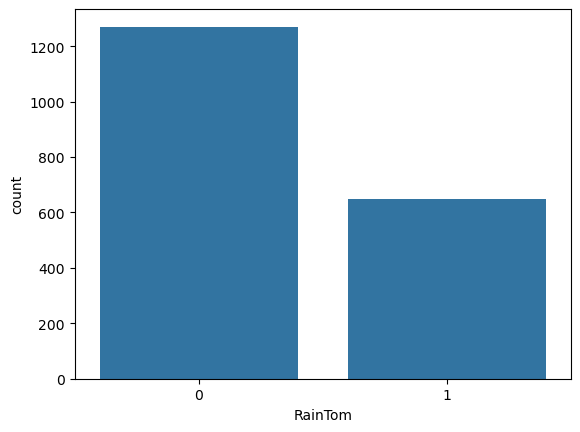

In [12]:
# plt.hist(Data['RainTom'])
sns.countplot(x ='RainTom', data = Data)
plt.show()

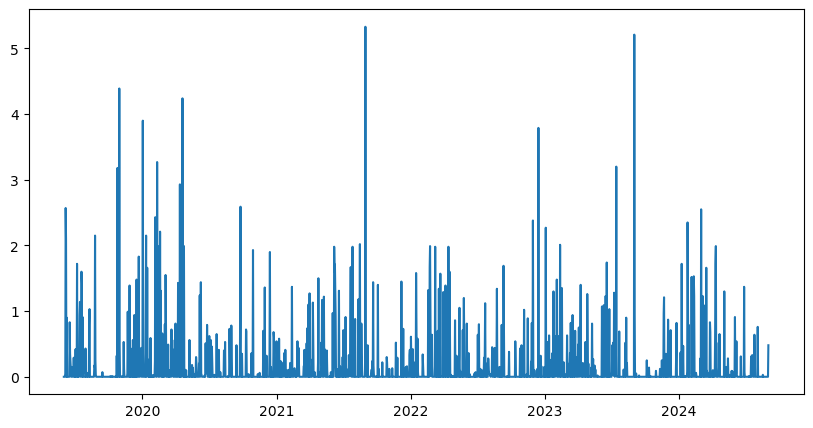

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(Data['Date'], Data['Precip'])


In [14]:
# Extract Month from Date
Data['Month'] = pd.to_datetime(Data['Date']).dt.month

# Move Month to next to Date
column_to_move = Data.pop('Month')
Data.insert(1, 'Month', column_to_move)

Data.head()

,Date,Month,Julian,AirTempMax,AirTempMin,AirTempObsv,HumidMax,HumidMin,HumidObsv,Precip,WindRun,AvgWindSpeed,WindDirection,SolarRadiation,SoilTempMax,SoilTempMin,SoilTempObsv,RainYN,RainTom
0,2019-06-01,6,152,90,67,76,92,35,65,0.00,84,3.5,334,645,84,75,75,0,0
1,2019-06-02,6,153,93,66,78,95,32,63,0.00,77,3.2,316,637,85,76,76,0,0
2,2019-06-03,6,154,92,69,77,96,36,75,0.00,60,2.5,60,620,85,77,77,0,0
3,2019-06-04,6,155,93,70,75,88,43,67,0.00,64,2.7,142,475,85,78,79,0,1
4,2019-06-05,6,156,88,70,80,96,48,77,0.05,124,5.2,232,326,83,80,80,1,1


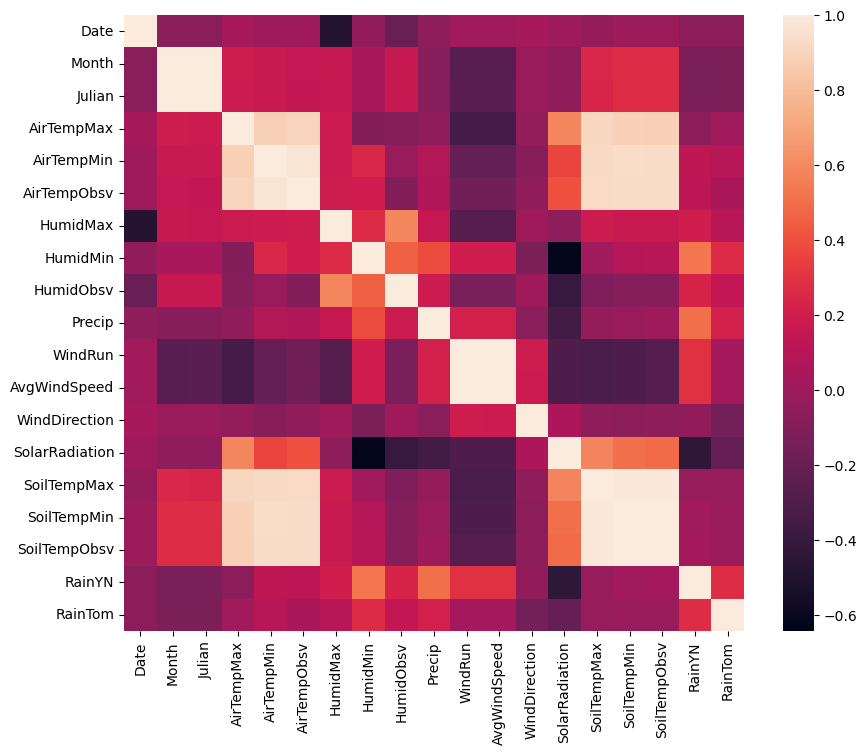

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr());


-----
## Machine Learning


In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    https://github.com/DTrimarchi10/confusion_matrix

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [17]:
# Create training & testing sets
from sklearn.model_selection import train_test_split
y = Data["RainTom"]
X = Data.drop(columns=["Date","RainTom"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')


X_train: (1533, 17) 
X_test: (384, 17) 
y_train: (1533,) 
y_test: (384,)


In [18]:
# What is our baseline? 
#
# For this problem, what would happen if we always answered no?
from sklearn.metrics import accuracy_score

y_pred_baseline = np.zeros(len(y_test))
print(f"baseline model accuracy = {accuracy_score(y_test, y_pred_baseline)}")


baseline model accuracy = 0.6171875


In [19]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01


# train a logistic regression model on the training set
lr_clf = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

y_pred_lr = lr_clf.predict(X_test)
print(f"LR model accuracy = {accuracy_score(y_test, y_pred_lr)}")

LR model accuracy = 0.6796875


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print(f"DT model accuracy = {accuracy_score(y_test, y_pred_dt)}")


DT model accuracy = 0.6484375


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


print(f"RF model accuracy = {accuracy_score(y_test, y_pred_rf)}")

RF model accuracy = 0.6927083333333334


<Axes: >

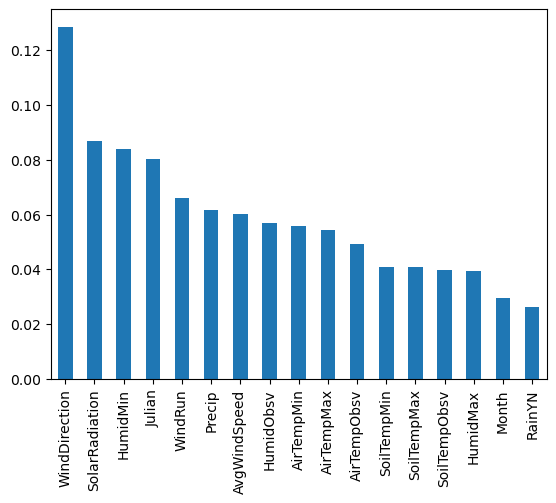

In [22]:
# Create a series containing features' importance from the model and feature names from the training data
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [23]:
# Tune hyperparameters - possible on all previous models

if False:
    from sklearn.model_selection import RandomizedSearchCV

    param_dist = {'n_estimators': range(50, 551, 50),
                  'max_depth': range(1,10)}

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(rf, 
                                     param_distributions=param_dist, 
                                     n_iter=10,
                                     cv=5,
                                     random_state=1)

    # Fit the random search object to the data
    rand_search.fit(X_train, y_train)

    # Create a variable for the best model
    best_rf = rand_search.best_estimator_

    # Print the best hyperparameters
    print('Best hyperparameters:',  rand_search.best_params_)

    predictions = best_rf.predict(X_test)
    accuracyScore = accuracy_score(y_test, predictions)
    print(f"Validation Accuracy with Tuned Random Forest: {accuracyScore}")
    
# Best hyperparameters: {'n_estimators': 50, 'max_depth': 9}
# Validation Accuracy with Tuned Random Forest: 0.6901041666666666


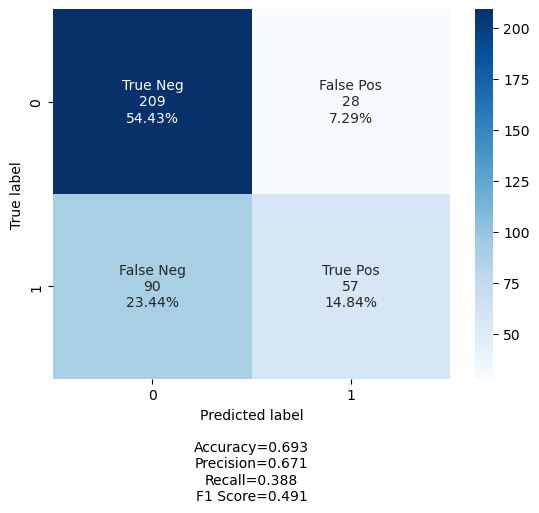

In [24]:
from sklearn.metrics import confusion_matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
cf_matrix = confusion_matrix(y_test, y_pred_rf)
make_confusion_matrix(cf_matrix, group_names=labels)

__Accuracy__ the ratio of true positives (TP) and true negatives (TN) to the total number of samples

__Precision__ the ratio of TP to the sum of TP and false positives (FP)

__Recall__ the ratio of TP to the sum of TP and false negatives (FN)

__F1 Score__ the harmonic mean of precision and recall

__Good and Bad Scores__
* Accuracy above 0.90 (90%) is considered excellent because it means the model correctly predicts 9 out of 10 instances. 

* Precision, Recall, and F1 score above 0.80 (80%) indicate strong performance. In a cancer detection model, Precision of 0.80 means 80% of positive predictions are correct, while Recall of 0.80 means 80% of actual cancer cases are identified. An F1 score of 0.80 signifies a balanced trade-off between Precision and Recall, crucial when both false positives and negatives have significant consequences.

* Scores below 0.50 (50%) are typically poor because they indicate that the model's performance is worse than random guessing. For instance, a credit card fraud detection system with an accuracy of 0.45 would be unreliable, as it's more likely to misclassify transactions than to correctly identify them.


/var/folders/qp/jmyby3tj0tjb35nlbs79x3n40000gq/T/ipykernel_43500/1663820554.py:83: RuntimeWarning: invalid value encountered in scalar divide
  precision = cf[1,1] / sum(cf[:,1])


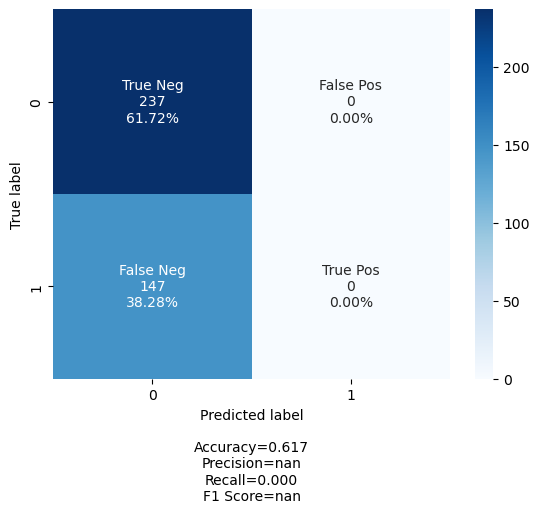

In [25]:
baseline_cf_matrix = confusion_matrix(y_test, y_pred_baseline)
make_confusion_matrix(baseline_cf_matrix, group_names=labels)


-----
## Where to go next....


### Unbalanced Classes

>  In a balanced dataset, the number of Positive and Negative labels is about equal. However, if one label is more common than the other label, then the dataset is imbalanced.
>
> Imbalanced datasets sometimes don't contain enough minority class examples to train a model properly.

* https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets
* https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
* https://datasciencehorizons.com/handling-imbalanced-datasets-in-scikit-learn-techniques-and-best-practices/

(2540, 17)
(2540,)
1270


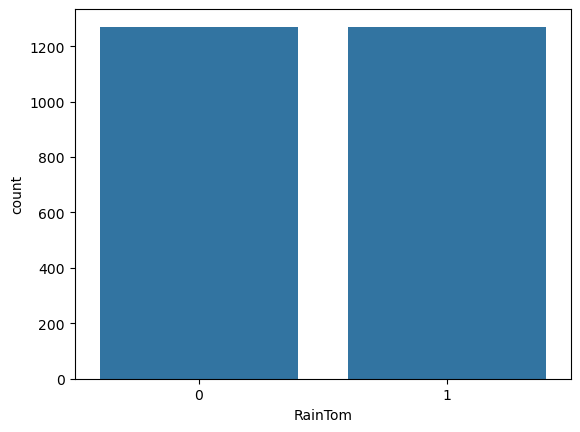

In [26]:
from sklearn.utils import resample
#
# Create oversampled training data set for minority class
#
X_oversampled, y_oversampled = resample(X[y == 1],  # Fewer rain days than 'no rain' days
                                        y[y == 1],
                                        replace=True,
                                        n_samples=X[y == 0].shape[0],
                                        random_state=1)

# Append the oversampled minority class to the imbalanced data and related labels
X_balanced = pd.concat([X[y == 0], X_oversampled])
y_balanced = pd.concat([y[y == 0], y_oversampled])

print(X_balanced.shape)
print(y_balanced.shape)
print(y_balanced.sum())

# plt.hist(Data['RainTom'])
sns.countplot(x ='RainTom', data = pd.DataFrame(y_balanced))
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=1)
print (f'X_train2: {X_train2.shape} \nX_test2: {X_test2.shape} \ny_train2: {y_train2.shape} \ny_test2: {y_test2.shape}')

bal_rf_clf = RandomForestClassifier().fit(X_train2, y_train2)
y_pred_bal_rf =bal_rf_clf.predict(X_test2)

print(f"\nRF model accuracy = {accuracy_score(y_test2, y_pred_bal_rf)}")

X_train2: (2032, 17) 
X_test2: (508, 17) 
y_train2: (2032,) 
y_test2: (508,)

RF model accuracy = 0.8641732283464567


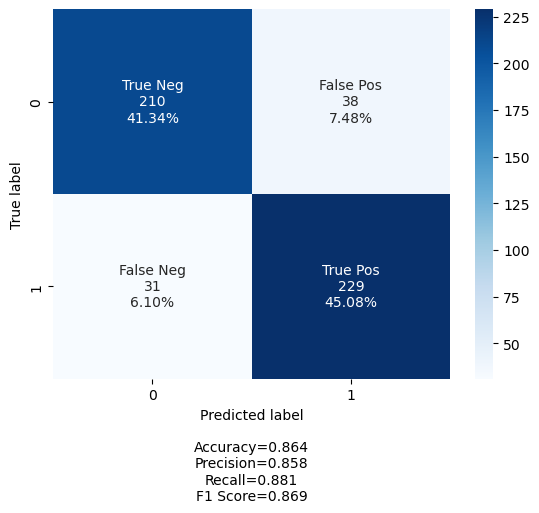

In [28]:
cf_matrix = confusion_matrix(y_test2, y_pred_bal_rf)
make_confusion_matrix(cf_matrix, group_names=labels)

In [29]:
# Do balanced classes help with any classifier?

from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
bal_lr_clf = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train2, y_train2)

y_pred_bal_lr = bal_lr_clf.predict(X_test)
print(f"LR model accuracy = {accuracy_score(y_test, y_pred_bal_lr)}")

LR model accuracy = 0.6666666666666666


<br>

### Normalize / Scale Data

> Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.
> 
> This includes algorithms that use a weighted sum of the input, like linear regression, and algorithms that use distance measures, like k-nearest neighbors.

* https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
* http://archive.today/2024.09.25-195922/https://www.geeksforgeeks.org/data-normalization-with-python-scikit-learn/


<br>

### Time Series Data

We ignored any time series information when training our models.

* https://builtin.com/data-science/time-series-forecasting-python
* https://www.kaggle.com/code/kanncaa1/time-series-prediction-tutorial-with-eda
* https://machinelearningmastery.com/start-here/#timeseries


<br>

### Predicting Rainfall Amount Categories

* https://www.kaggle.com/code/satishgunjal/binary-multiclass-classification-using-sklearn#Multiclass-Classification
* http://archive.today/2023.10.29-124722/https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362
* http://archive.today/2024.09.25-193956/https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/


In [30]:
bins = [-1.0, 0.00001, 0.39, 1.18, 100]
labels = ['NoRain', 'Light', 'Moderate', 'Heavy']
Data['RainCategory'] = pd.cut(Data['Precip'], bins, labels=labels)

print(Data.groupby('RainCategory', observed=True).size())

RainCategory
NoRain      1271
Light        405
Moderate     152
Heavy         89
dtype: int64


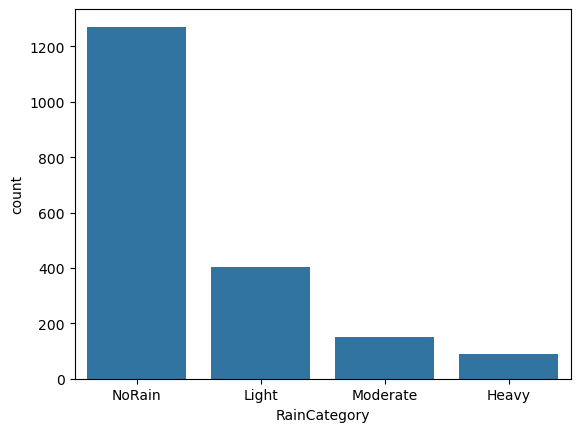

In [31]:
# Just pyplot
# plt.hist(Data.RainCategory)

# Using seaborn
sns.countplot(x ='RainCategory', data = Data)
plt.show()